## Regresión lineal con datos de Galton

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('../data/data_galton.csv',header='infer') # Cargar datos, la primera fila contiene los nombres de las columnas

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   child   928 non-null    float64
 1   parent  928 non-null    float64
dtypes: float64(2)
memory usage: 14.6 KB


In [4]:
mis_repetidos = pd.crosstab(df['parent'], df['child'])
mis_repetidos

child,61.7,62.2,63.2,64.2,65.2,66.2,67.2,68.2,69.2,70.2,71.2,72.2,73.2,73.7
parent,,,,,,,,,,,,,,
64.0,1,0,2,4,1,2,2,1,1,0,0,0,0,0
64.5,1,1,4,4,1,5,5,0,2,0,0,0,0,0
65.5,1,0,9,5,7,11,11,7,7,5,2,1,0,0
66.5,0,3,3,5,2,17,17,14,13,4,0,0,0,0
67.5,0,3,5,14,15,36,38,28,38,19,11,4,0,0
68.5,1,0,7,11,16,25,31,34,48,21,18,4,3,0
69.5,0,0,1,16,4,17,27,20,33,25,20,11,4,5
70.5,1,0,1,0,1,1,3,12,18,14,7,4,3,3
71.5,0,0,0,0,1,3,4,3,5,10,4,9,2,2


### Estudio de alturas

In [5]:
filas=mis_repetidos.shape[0]
columnas=mis_repetidos.shape[1]
altura_hijos = list(mis_repetidos.columns)
altura_padres = list(mis_repetidos.index)
numero_repeticiones = [(padre,hijo,mis_repetidos.loc[padre, hijo]) for padre in altura_padres for hijo in altura_hijos]
df_repeticiones = pd.DataFrame(numero_repeticiones, columns=['padre','hijo','repeticiones'])
df_repeticiones

,padre,hijo,repeticiones
0,64.0,61.7,1
1,64.0,62.2,0
2,64.0,63.2,2
3,64.0,64.2,4
4,64.0,65.2,1
...,...,...,...
149,73.0,70.2,0
150,73.0,71.2,0
151,73.0,72.2,1
152,73.0,73.2,3


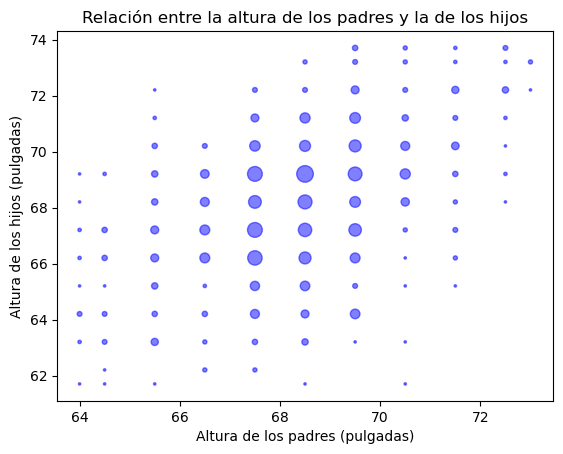

In [7]:
plt.scatter(df_repeticiones['padre'], df_repeticiones['hijo'], s=df_repeticiones['repeticiones']*3, alpha=0.5, color='blue')
plt.xlabel('Altura de los padres (pulgadas)')
plt.ylabel('Altura de los hijos (pulgadas)')
plt.title('Relación entre la altura de los padres y la de los hijos')
plt.show()

In [8]:
### Entrenamiento del modelo de regresión lineal
lm = LinearRegression() # Crear el modelo de regresión lineal
X = df[['parent']] # Variable independiente (altura de los padres)
y = df['child']    # Variable dependiente (altura de los hijos)
lm.fit(X, y) # Entrenar el modelo con los datos de padres e hijos


LinearRegression()

In [9]:
lm.coef_  # Coeficiente de la regresión (pendiente). representa el cambio en la altura del hijo por cada pulgada de cambio en la altura del padre

array([0.64629058])

In [10]:
lm.intercept_  # Intersección con el eje Y. representa la altura promedio del hijo cuando la altura del padre es 0 (teóricamente)

23.94153018041291

In [12]:
preY = lm.predict(X)  # Predecir las alturas de los hijos usando el modelo entrenado

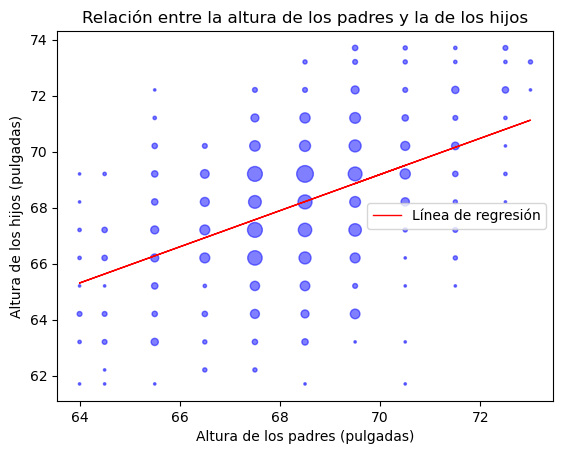

In [15]:
plt.plot(df['parent'],preY,color='red',linewidth=1, label='Línea de regresión',linestyle='-') # Graficar la línea de regresión, sobre el mismo gráfico de dispersión
plt.scatter(df_repeticiones['padre'], df_repeticiones['hijo'], s=df_repeticiones['repeticiones']*3, alpha=0.5, color='blue')
plt.xlabel('Altura de los padres (pulgadas)')
plt.ylabel('Altura de los hijos (pulgadas)')
plt.title('Relación entre la altura de los padres y la de los hijos')
plt.legend()
plt.show()